**DATA DIRI**

1.   Nama: Juan Andrew Sasongko
2.   Email: juandreww108@gmail.com

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-11 05:00:00--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  6.04MB/s    in 68s     

2021-07-11 05:01:09 (4.51 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
val_rock = os.path.join(validation_dir, 'rock')

train_paper = os.path.join(train_dir, 'paper')
val_paper = os.path.join(validation_dir, 'paper')

train_scissors = os.path.join(train_dir, 'scissors')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
list_directory=[train_dir,validation_dir,train_rock,val_rock,
                train_paper,val_paper,train_scissors,val_scissors]
for i in list_directory:
  os.mkdir(i)

In [ ]:
from sklearn.model_selection import train_test_split
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [ ]:
import zipfile,os,shutil
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=0.2)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(224, 224),  # res 240 x 240
        batch_size=32,
        color_mode='rgb',
        class_mode='categorical',
        shuffle = True,
        seed=42)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,  # direktori data latih
        target_size=(224, 224),  # res 240 x 240
        batch_size=32,
        color_mode='rgb',
        class_mode='categorical',
        shuffle = True,
        seed=42)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
sample_train_images, _ = next(train_generator)
sample_val_images, _ = next(validation_generator)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

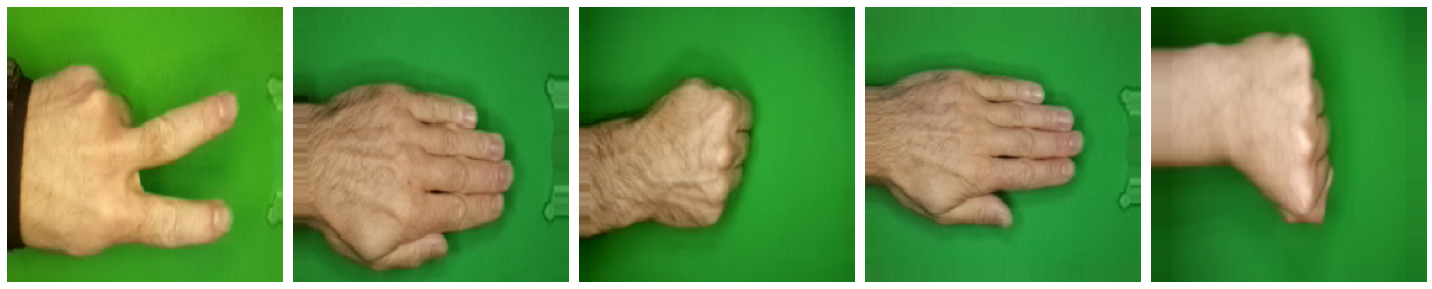

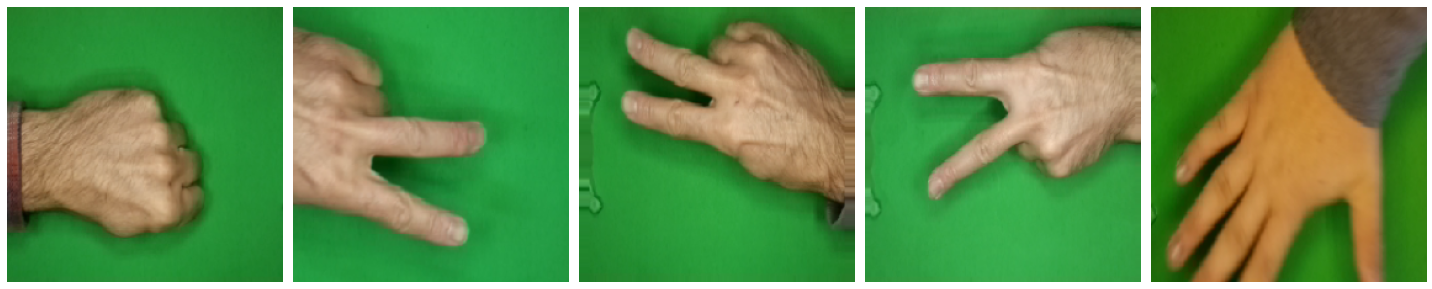

In [ ]:
import matplotlib.pyplot as plt

plotImages(sample_train_images[:5])
plotImages(sample_val_images[:5])

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history_model = model.fit(train_generator, 
          steps_per_epoch=20, 
          epochs=12, 
          validation_data=validation_generator,
          validation_steps=5,
          verbose=1)

Epoch 1/12
20/20 [==============================] - 54s 3s/step - loss: 1.0923 - accuracy: 0.4313 - val_loss: 0.8639 - val_accuracy: 0.6875
Epoch 2/12
20/20 [==============================] - 52s 3s/step - loss: 0.7105 - accuracy: 0.7406 - val_loss: 0.5658 - val_accuracy: 0.7937
Epoch 3/12
20/20 [==============================] - 52s 3s/step - loss: 0.4138 - accuracy: 0.8500 - val_loss: 0.2496 - val_accuracy: 0.9062
Epoch 4/12
20/20 [==============================] - 52s 3s/step - loss: 0.2791 - accuracy: 0.9031 - val_loss: 0.2333 - val_accuracy: 0.9125
Epoch 5/12
20/20 [==============================] - 52s 3s/step - loss: 0.2543 - accuracy: 0.9234 - val_loss: 0.5289 - val_accuracy: 0.8625
Epoch 6/12
20/20 [==============================] - 53s 3s/step - loss: 0.2679 - accuracy: 0.9078 - val_loss: 0.2784 - val_accuracy: 0.9000
Epoch 7/12
20/20 [==============================] - 52s 3s/step - loss: 0.1687 - accuracy: 0.9422 - val_loss: 0.1807 - val_accuracy: 0.9375
Epoch 8/12
20/20 [==

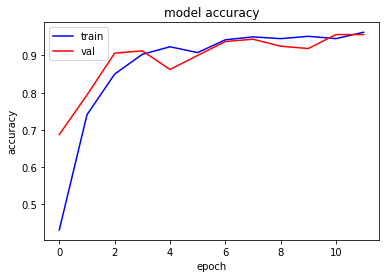

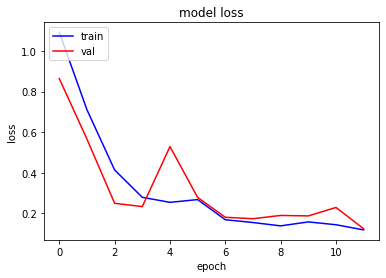

In [ ]:
import matplotlib.pyplot as plt

acc = history_model.history['accuracy']
val_acc = history_model.history['val_accuracy']

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving e6cXS0w2KOKKEYZU.png to e6cXS0w2KOKKEYZU.png
ROCK


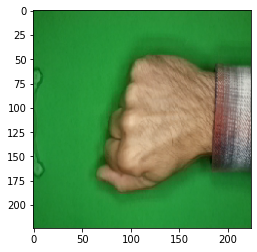

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')

In [ ]:
model_new = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, 
          steps_per_epoch=20, 
          epochs=12, 
          validation_data=validation_generator,
          validation_steps=5,
          verbose=1)

Epoch 1/12
20/20 [==============================] - 53s 3s/step - loss: 0.2840 - accuracy: 0.9109 - val_loss: 0.1801 - val_accuracy: 0.9625
Epoch 2/12
20/20 [==============================] - 52s 3s/step - loss: 0.1263 - accuracy: 0.9625 - val_loss: 0.1088 - val_accuracy: 0.9438
Epoch 3/12
20/20 [==============================] - 54s 3s/step - loss: 0.0901 - accuracy: 0.9719 - val_loss: 0.1595 - val_accuracy: 0.9500
Epoch 4/12
20/20 [==============================] - 52s 3s/step - loss: 0.0727 - accuracy: 0.9766 - val_loss: 0.1052 - val_accuracy: 0.9625
Epoch 5/12
20/20 [==============================] - 52s 3s/step - loss: 0.0962 - accuracy: 0.9719 - val_loss: 0.1765 - val_accuracy: 0.9438
Epoch 6/12
20/20 [==============================] - 54s 3s/step - loss: 0.0832 - accuracy: 0.9828 - val_loss: 0.0837 - val_accuracy: 0.9688
Epoch 7/12
20/20 [==============================] - 52s 3s/step - loss: 0.0560 - accuracy: 0.9859 - val_loss: 0.1653 - val_accuracy: 0.9375
Epoch 8/12
20/20 [==

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


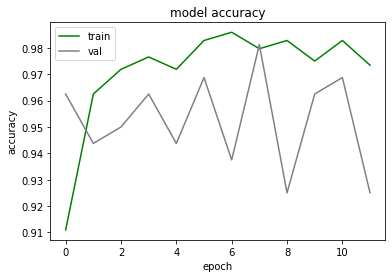

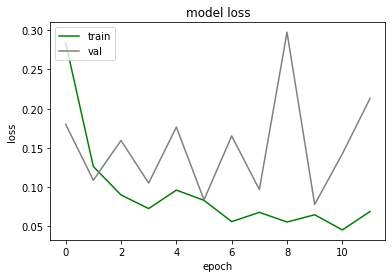

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, color='green')
plt.plot(val_acc, color='grey')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='green')
plt.plot(val_loss, color='grey')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()